PART 1: Python, Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("challenge_data.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [22]:
print("Number of orders: ", len(np.unique(df['order_id'])))
# each row in the table is a unique order, so we can look closer at the spread of order_amount

Number of orders:  5000


In [27]:
print("Summary statistics of order_amount: ", df['order_amount'].describe())
# there is a huge standard deviation, which is due to the incredibly high value of the maximum. 
# Let's see where this maximum occurs

Summary statistics of order_amount:  count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


In [26]:
print(df[df['order_amount'] == 704000])
# It looks like a single user ordered a large number of items many times, which could either be 
# a financial mistake with the transaction or it could just be strange behavior of one user (less likely)
# It would be interesting to see the spread of amounts without this high value.

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    c

In [28]:
print(df[df['order_amount'] != 704000]['order_amount'].sort_values(ascending=False))
# It looks like there are still some large spenders, since the next highest values are also above 100k. 
# One more thing we can do is look at the spread

691     154350
2492    102900
3724     77175
1259     77175
4420     77175
         ...  
3871        90
3363        90
4923        90
158         90
2503        90
Name: order_amount, Length: 4983, dtype: int64


With the extreme outlier: 


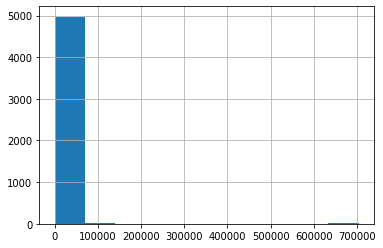

In [33]:
print("With the extreme outlier: ")
df['order_amount'].hist()
# extremely skewed right

Without the extreme outlier: 


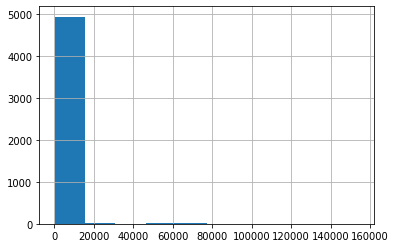

In [34]:
print("Without the extreme outlier: ")
df[df['order_amount'] < 704000]['order_amount'].hist()
# Still extremely skewed right. Let's remove outliers and try again.

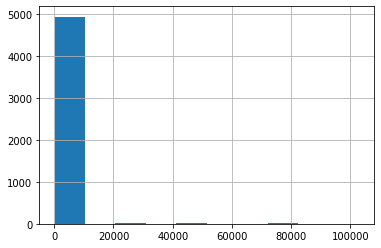

In [44]:
from scipy import stats
df[(np.abs(stats.zscore(df['order_amount'])) < 3)]['order_amount'].hist()
# Still very skewed, but getting better

b) What metric would you report for this dataset?

In [47]:
# Since it has been challenging to improve the skew of the mean due to extreme values, we can
# turn to another metric to represent the data: the median.

c) What is its value?

In [48]:
print("Median order amount: ", np.median(df['order_amount']))
# This value is much more reasonable and realistic, so we should report the median.|

Median order amount:  284.0


--------

PART 2: SQL

1)

54 orders


SELECT COUNT(*) FROM Orders as O JOIN Shippers as S on O.ShipperID = S.ShipperID WHERE S.ShipperName = "Speedy Express";

2)

Peacock

SELECT E.LastName FROM Orders as O INNER JOIN Employees as E ON O.EmployeeID = E.EmployeeID GROUP BY E.LastName ORDER BY COUNT(O.OrderID) DESC LIMIT 1;

3)

Gorgonzola Telino

SELECT P.ProductName FROM Orders as O INNER JOIN Customers as C ON O.CustomerID = C.CustomerID 
INNER JOIN OrderDetails as OD ON O.OrderID = OD.OrderID 
INNER JOIN Products as P ON OD.ProductID = P.ProductID 
WHERE C.Country = 'Germany' 
GROUP BY P.ProductName 
ORDER BY COUNT(P.ProductName) DESC LIMIT 1;